# Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import cohen_kappa_score

# Data

In [3]:
# import some data to play with
cancer = load_breast_cancer()

# Preprocess

In [4]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model
## Trainning

In [5]:
logreg = LogisticRegression(C=1e5)
# fit the model
logreg.fit(X_train, y_train)
# predict
y_pred = logreg.predict(X_test)

C:\Users\didi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Evaluation

In [10]:
# the evaluatino function
def classification_evaluation(y_test, predictions, display=True):
    # result
    cl_report = classification_report(y_test, predictions)
    
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    score_f1 = f1_score(y_test, predictions) 
    roc_auc = roc_auc_score(y_test, predictions)
    kappa_metric = cohen_kappa_score(y_test, predictions)
    
    
    # display
    if display:
        print("\n Classification report : \n", cl_report)
        print("Accuracy Score    : ", np.round(accuracy, 2))
        print("Recall Score      : ", np.round(precision, 2))
        print("Precision Score   : ", np.round(recall, 2))
        print("f1 Score          : ", np.round(score_f1, 2))
        print("kappa Score       : ", np.round(kappa_metric, 2), "\n")
        print("Area under curve  : ", np.round(roc_auc, 2))
    
    # store the result
    result = []
    result.append({
        'accu': accuracy,
        'precison': precision,
        'recall': recall,
        'f1': score_f1,
        'auc': roc_auc,
        'kappa': kappa_metric
    })
    df_result = pd.DataFrame(result, columns=['accu', 'precison', 'recall', 'f1', 'auc', 'kappa'])
    return df_result

In [11]:
result = classification_evaluation(y_test, y_pred, display=True)


 Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        47
           1       0.97      0.96      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score    :  0.96
Recall Score      :  0.97
Precision Score   :  0.96
f1 Score          :  0.96
kappa Score       :  0.91 

Area under curve  :  0.96


##  Visualization

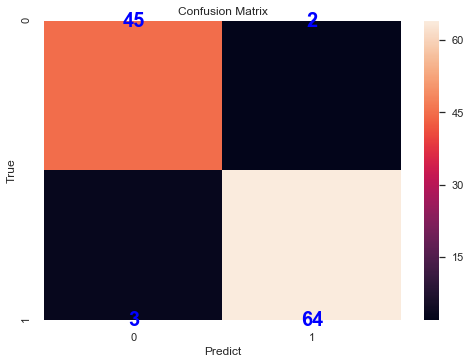

In [32]:
# plot confuse matrix
def plot_confusion_matrix(y_true, y_pred):
    
    sns.set()
    f, ax = plt.subplots()
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    ax = sns.heatmap(cm, annot=True, annot_kws={'size':20, 'weight':'bold', 'color':'blue'})

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predict')
    ax.set_ylabel('True')

plot_confusion_matrix(y_test, y_pred)